In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt

import cv2

In [2]:
file = "output_files/csv_files/cloud_1.csv"

print("File existance is: ", os.path.exists(file))


File existance is:  True


In [3]:
scan = np.genfromtxt(file, delimiter=',', dtype=np.float64)

print(scan.shape)


(57622, 3)


In [4]:
xs = scan[:,0]
ys = scan[:,1]
zs = scan[:,2]

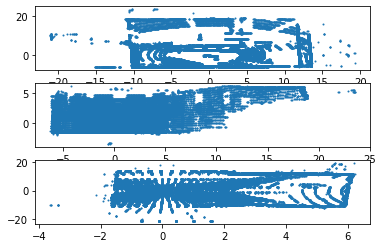

In [5]:
fig, axs = plt.subplots(3,1)
axs[0].scatter(xs,ys, s = 1)
axs[1].scatter(ys,zs, s = 1)
axs[2].scatter(zs,xs, s = 1)

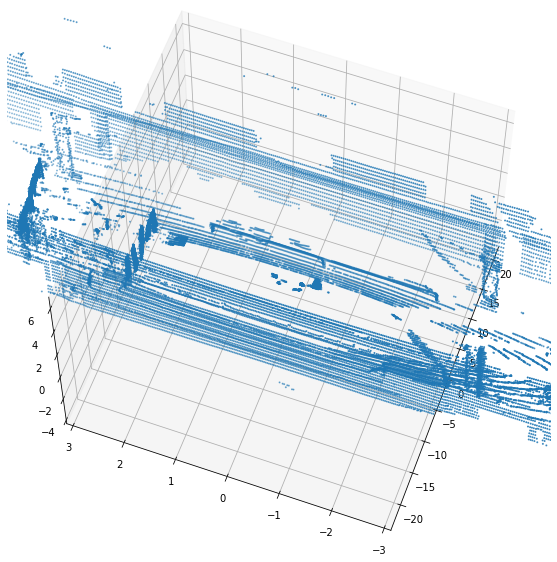

In [6]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, s= 1)
# ax.set_zlim3d(-10,10)
ax.set_ylim3d(-3,3)
# ax.set_zlim3d(-10,10)
ax.view_init(elev=60, azim=200)

plt.savefig("temp.png", bbox_inches='tight')

557 562


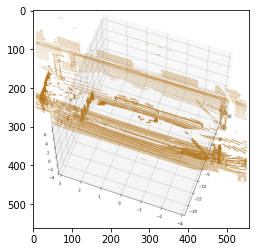

In [7]:
frame = cv2.imread("temp.png")

h, w = frame.shape[:2]

print(w,h)
plt.imshow(frame)

OSError: [Errno 28] No space left on device

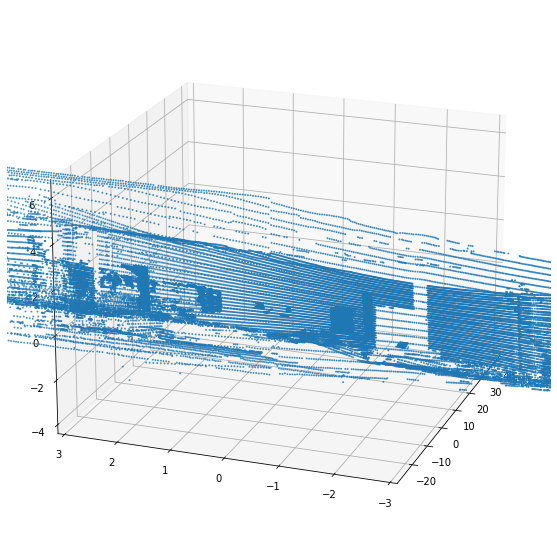

In [8]:
import time

path = "output_files/csv_files/"
out_path = "sanity_check/"
fn = "cloud_{}.csv"

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter("sanity_check.mp4", fourcc, 10, (w, h))

for i in range(0,len(os.listdir(path))):
    
    scan = np.genfromtxt(path + fn.format(i), delimiter=',', dtype=np.float64)
    
    xs = scan[:,0]
    ys = scan[:,1]
    zs = scan[:,2]
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, s= 1)
    # ax.set_zlim3d(-10,10)
    ax.set_ylim3d(-3,3)
    # ax.set_zlim3d(-10,10)
    ax.view_init(elev=20, azim=200)
    
    plt.savefig("temp.png",bbox_inches='tight')
    plt.savefig(out_path + fn.format(i).replace(".csv",".png"),bbox_inches='tight')
    
    plt.close()
    
    time.sleep(1)
    
    frame = cv2.imread("temp.png")
    
    writer.write(frame)
    
writer.release()